In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each longitude and latitude conbination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# print the city length to confirm sufficient count

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1    
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bargal
City not found. Skipping...
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | narsaq
Processing Record 4 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 1 | port hardy
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | ruwi
Processing Record 8 of Set 1 | kununurra
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | shelburne
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | orhei
Processing Record 15 of Set 1 | caravelas
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | salaga
Processing Record 18 of Set 1 | erzin
Processing Record 19 of Set 1 | evensk
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | port alfred
Processing R

Processing Record 39 of Set 4 | burica
City not found. Skipping...
Processing Record 40 of Set 4 | olafsvik
Processing Record 41 of Set 4 | abu samrah
Processing Record 42 of Set 4 | hambantota
Processing Record 43 of Set 4 | yar-sale
Processing Record 44 of Set 4 | kapit
Processing Record 45 of Set 4 | provideniya
Processing Record 46 of Set 4 | asau
Processing Record 47 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 4 | husavik
Processing Record 49 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 50 of Set 4 | port moresby
Processing Record 1 of Set 5 | nadvoitsy
Processing Record 2 of Set 5 | praia da vitoria
Processing Record 3 of Set 5 | san patricio
Processing Record 4 of Set 5 | bodden town
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | tapes
Processing Record 7 of Set 5 | matcha
Processing Record 8 of Set 5 | kruisfontein
Processing Record 9 of Set 5 | oranjestad
Processing Record 10 of Set 5 | jacareacang

Processing Record 27 of Set 8 | collie
Processing Record 28 of Set 8 | esterhazy
Processing Record 29 of Set 8 | cravo norte
Processing Record 30 of Set 8 | krasnoarmeysk
Processing Record 31 of Set 8 | praia
Processing Record 32 of Set 8 | urumqi
Processing Record 33 of Set 8 | beloha
Processing Record 34 of Set 8 | ponta do sol
Processing Record 35 of Set 8 | king city
Processing Record 36 of Set 8 | huarmey
Processing Record 37 of Set 8 | reinosa
Processing Record 38 of Set 8 | mayya
Processing Record 39 of Set 8 | tuban
Processing Record 40 of Set 8 | azanka
Processing Record 41 of Set 8 | kloulklubed
Processing Record 42 of Set 8 | samusu
City not found. Skipping...
Processing Record 43 of Set 8 | belmonte
Processing Record 44 of Set 8 | komsomolskiy
Processing Record 45 of Set 8 | port elizabeth
Processing Record 46 of Set 8 | rogovatoye
Processing Record 47 of Set 8 | toliary
City not found. Skipping...
Processing Record 48 of Set 8 | san andres
Processing Record 49 of Set 8 | j

Processing Record 18 of Set 12 | cariati
Processing Record 19 of Set 12 | halalo
City not found. Skipping...
Processing Record 20 of Set 12 | winnemucca
Processing Record 21 of Set 12 | celestun
Processing Record 22 of Set 12 | jackson
Processing Record 23 of Set 12 | thompson
Processing Record 24 of Set 12 | saint-leu
Processing Record 25 of Set 12 | vilyuysk
Processing Record 26 of Set 12 | puerto escondido
Processing Record 27 of Set 12 | huanren
Processing Record 28 of Set 12 | weston
Processing Record 29 of Set 12 | koutsouras
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,25.75,75,20,2.30,CA,2022-02-19 21:38:16
1,Narsaq,60.9167,-46.0500,17.82,81,100,5.21,GL,2022-02-19 21:38:16
2,Port Hardy,50.6996,-127.4199,41.76,87,100,5.75,CA,2022-02-19 21:38:16
3,Lompoc,34.6391,-120.4579,74.08,68,0,12.66,US,2022-02-19 21:36:43
4,Ruwi,23.5996,58.5507,67.69,63,8,3.13,OM,2022-02-19 21:38:17
5,Kununurra,-15.7667,128.7333,76.98,88,95,1.14,AU,2022-02-19 21:34:53
6,Tasiilaq,65.6145,-37.6368,23.16,59,100,29.10,GL,2022-02-19 21:38:17
7,Vaini,-21.2000,-175.2000,84.36,79,20,5.75,TO,2022-02-19 21:38:17
8,Shelburne,44.0787,-80.2041,15.13,85,80,20.89,CA,2022-02-19 21:38:18
9,Bethel,41.3712,-73.4140,33.10,69,99,10.00,US,2022-02-19 21:36:21


In [13]:
city_data_new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_updated_df = city_data_df[city_data_new_order]
city_data_updated_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Torbay,CA,2022-02-19 21:38:16,47.6666,-52.7314,25.75,75,20,2.30
1,Narsaq,GL,2022-02-19 21:38:16,60.9167,-46.0500,17.82,81,100,5.21
2,Port Hardy,CA,2022-02-19 21:38:16,50.6996,-127.4199,41.76,87,100,5.75
3,Lompoc,US,2022-02-19 21:36:43,34.6391,-120.4579,74.08,68,0,12.66
4,Ruwi,OM,2022-02-19 21:38:17,23.5996,58.5507,67.69,63,8,3.13
5,Kununurra,AU,2022-02-19 21:34:53,-15.7667,128.7333,76.98,88,95,1.14
6,Tasiilaq,GL,2022-02-19 21:38:17,65.6145,-37.6368,23.16,59,100,29.10
7,Vaini,TO,2022-02-19 21:38:17,-21.2000,-175.2000,84.36,79,20,5.75
8,Shelburne,CA,2022-02-19 21:38:18,44.0787,-80.2041,15.13,85,80,20.89
9,Bethel,US,2022-02-19 21:36:21,41.3712,-73.4140,33.10,69,99,10.00


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

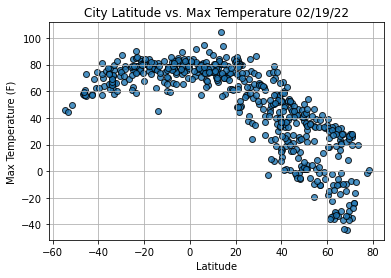

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

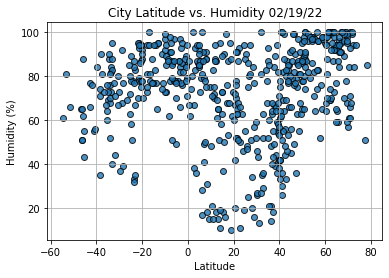

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

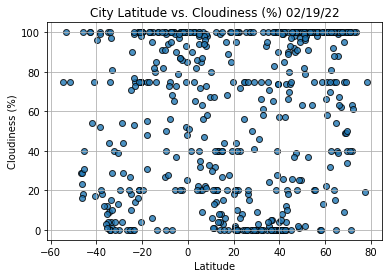

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

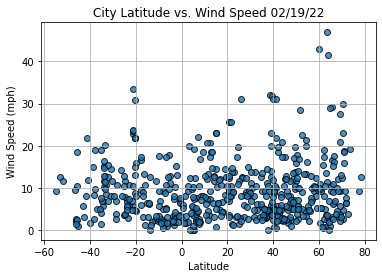

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates): 
    
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                       Salaga
Lat                        8.5508
Lng                       -0.5188
Max Temp                    89.24
Humidity                       31
Cloudiness                     98
Wind Speed                   8.16
Country                        GH
Date          2022-02-19 21:38:19
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      True
1      True
2      True
3      True
4      True
       ... 
533    True
534    True
535    True
536    True
537    True
Name: Lat, Length: 538, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,25.75,75,20,2.30,CA,2022-02-19 21:38:16
1,Narsaq,60.9167,-46.0500,17.82,81,100,5.21,GL,2022-02-19 21:38:16
2,Port Hardy,50.6996,-127.4199,41.76,87,100,5.75,CA,2022-02-19 21:38:16
3,Lompoc,34.6391,-120.4579,74.08,68,0,12.66,US,2022-02-19 21:36:43
4,Ruwi,23.5996,58.5507,67.69,63,8,3.13,OM,2022-02-19 21:38:17
...,...,...,...,...,...,...,...,...,...
533,Vilyuysk,63.7553,121.6247,-32.58,100,88,3.60,RU,2022-02-19 21:51:57
534,Puerto Escondido,15.8500,-97.0667,85.80,50,0,6.35,MX,2022-02-19 21:49:13
535,Huanren,41.2647,125.3667,1.09,100,99,0.43,CN,2022-02-19 21:51:57
536,Weston,26.1004,-80.3998,84.22,75,20,8.05,US,2022-02-19 21:51:57


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,25.75,75,20,2.30,CA,2022-02-19 21:38:16
1,Narsaq,60.9167,-46.0500,17.82,81,100,5.21,GL,2022-02-19 21:38:16
2,Port Hardy,50.6996,-127.4199,41.76,87,100,5.75,CA,2022-02-19 21:38:16
3,Lompoc,34.6391,-120.4579,74.08,68,0,12.66,US,2022-02-19 21:36:43
4,Ruwi,23.5996,58.5507,67.69,63,8,3.13,OM,2022-02-19 21:38:17


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

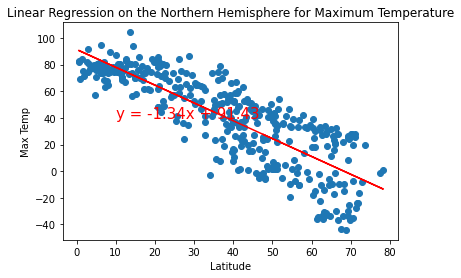

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

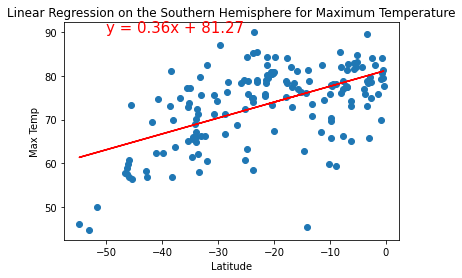

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

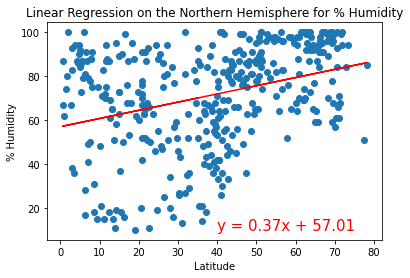

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

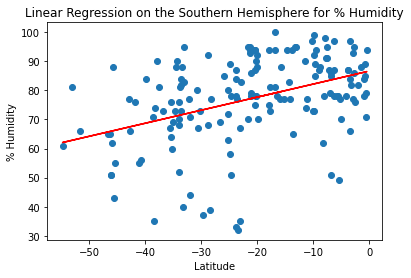

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

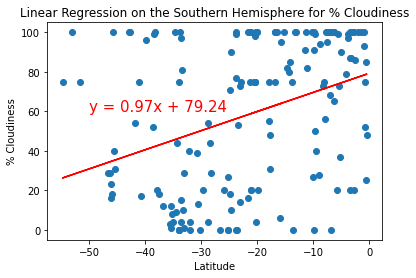

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

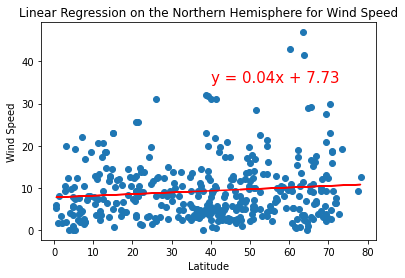

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

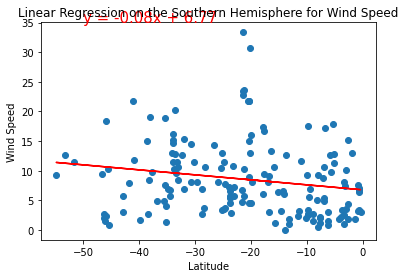

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))